<a href="https://colab.research.google.com/github/jay2jaykp/operation-odessa/blob/data-discovery/operation_odessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Kaggle API Key](https://medium.com/analytics-vidhya/using-the-kaggle-api-to-import-datasets-into-google-colaboratory-3ce56fb6ced0)

Click above link and follow set of instructions to authenticate kaggle-api for automated kaggle competition workflow.

1.   Generate kaggle api & download to local machine 
2.   Hit the `Choose Files` button below to authenticate 






In [1]:
#upload kaggle.json into Google Colab environemnt
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jay2jaykp","key":"4dc784a5475d27f98c34707343fd5a7d"}'}

In [ ]:
%%html
<iframe style="border: 1px solid rgba(0, 0, 0, 0.1);" width="1000" height="600" src="https://www.figma.com/embed?embed_host=share&url=https%3A%2F%2Fwww.figma.com%2Ffile%2FKkR26Yvur3qfJhlbT5643m%2FUntitled%3Fnode-id%3D102%253A501" allowfullscreen></iframe>

# Kaggle Config

Run Linux and pip commands to create directory and install libraries to run in Google Colab Environment. 

In [2]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json #owner permission
!kaggle config path -p /content # accept terms & conditions https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting -p 'walmart-recruiting-store-sales-forecasting'

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=90e7439f7f7c5c29b34f0d91e71677526f6a5dce72da176b9d00fd81dd601637
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
kaggle.json
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 202MB/s]


# Dependancies

Restart local variables b/c of pyunpack dependancy if required.

In [3]:
### unzip
!pip install pyunpack

### Requirements Text

In [4]:
!pip freeze > requirements.txt

# Libraries

In [99]:
 import os
 from pathlib import Path
 import seaborn as sns
 import matplotlib.pyplot as plt
 from pyunpack import Archive
 import pandas as pd
 from functools import reduce

# Module

### Data Congestion Pipeline 

In [6]:
file_dir = "/walmart-recruiting-store-sales-forecasting" # get the current working directory

In [7]:
class data_congestion: 
  """ Pipeline to handle data conversion and summary metrics.
  """
  def __init__(self,  file_dir, file_ext):
    """Connects to file directory.
    Args:
      file_dir: A string identifying the location.
      file_ext: A string identifying the file 
    """
    self.file_path = os.getcwd() + file_dir # assign file path
    self.file_ext = file_ext # set file extension

  def get_path(self): 
    """Connects to file directory.
    Args:
      file_dir: A string identify the location.
    Returns the set file path. 
    """
    return self.file_path

  def get_zip_files(self):
    """ Extract zip files into csv files. And remove all existing zip files.
    """
    os.chdir(self.file_path)
    for csv_file in os.listdir(self.file_path):
      if csv_file.endswith(self.file_ext):
        Archive(csv_file).extractall('.')
        os.remove(csv_file)
    os.chdir('/content')
  
  def get_df(self): 
    """ Return summary of dataframes in file_path.
    """
    os.chdir(self.file_path)
    for df_ in os.listdir():
      print(df_)
      df = pd.read_csv(df_)
      print(df.describe())
      print(df.info())
      print(df.head())
    os.chdir('/content')

### Data Exploration

In [8]:
class data_exploration: 
  """
  """
  def __init__(self, file_dir, *dfs, test, join):
    """ Merge data sources and preprocessing 
    """
    self.file_path = os.getcwd() + file_dir
    self.dfs = dfs  
    filenames = [self.file_path + '/' + i for i in self.dfs]

    ## merges args
    if len(filenames) ==0: 
      first_df = pd.read_csv(filenames)
    else:
      first_df = pd.read_csv(filenames[0])
      for i in filenames[1:]:
        first_df = first_df.merge(pd.read_csv(i), how= join)
    self.df = first_df

  def get_null(self): 
    """
    """
    return self.df.isnull().sum()
  def get_remove(self, *col):
    """
    """
  def get_parse_date(self):
    """
    """
    self.df.Date = pd.to_datetime(self.df.Date)
    self.df.set_index(keys = "Date", inplace = True)
    return self.df

  def get_types(self):
    """
    """
    return self.df.dtypes

  def get_scatter(self, y):
    ax = sns.scatterplot(x = self.df.index , y =self.df[y], data = self.df)
    ax.set(xlabel='Date', ylabel=y)

  def get_boxplot(self, x): 
    sns.boxplot(x = self.df[x]);

  def get_heatmap(self): 
    sns.heatmap(self.df.corr(), vmin = -1, vmax = 1, annot = True)

## Timeseries Model

## ML Model 

## DL Model

# Scripts

In [16]:
start_data = data_congestion(file_dir, '.zip')
start_data.get_zip_files()
# start_data.get_df()

In [17]:
clean_df =data_exploration(file_dir, 'train.csv', 'features.csv','stores.csv', test="test.csv", join='left')
# clean_df.get_parse_date()
# print(clean_df.get_null())
# print(clean_df.get_types())
df = clean_df.df

## Data Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [20]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


How Many Departments we have for each store ?

In [21]:
# slicing the dataframe for unique store-dept combinations
store_dept_df = df[['Store', 'Dept']].drop_duplicates().groupby("Store").agg(dept_count=("Dept", "count"))
store_dept_df.head()

,dept_count
Store,
1,77
2,78
3,72
4,78
5,72


In [22]:
store_dept_df.describe()

,dept_count
count,45.000000
mean,74.022222
std,5.654800
min,61.000000
25%,74.000000
50%,77.000000
75%,77.000000
max,79.000000


Find Top 5 High Performing Departments across all Stores

In [52]:
# top_5_dept
# import datetime
top_5_dept = df.loc[:, ('Dept','Date', 'Weekly_Sales')]
# top_5_dept['year'] = pd.DatetimeIndex(top_5_dept['Date']).year
# top_5_dept['month'] = pd.DatetimeIndex(top_5_dept['Date']).month
# top_5_dept = top_5_dept.groupby(['Dept','year'], as_index=False).agg(avg_sales=('Weekly_Sales', "mean"))
top_5_dept = top_5_dept.groupby(['Dept'], as_index=False).agg(avg_sales=('Weekly_Sales', 'mean'))
top_5_dept = top_5_dept.sort_values('avg_sales', ascending=False).head()['Dept'].to_numpy()

array([92, 95, 38, 72, 65])

Find Top 5 High Performing Stores across all Department

In [53]:
# top_5_store
top_5_store = df.loc[:, ('Store', 'Weekly_Sales')].groupby('Store', as_index=False).agg(avg_sales=('Weekly_Sales', 'mean')).sort_values('avg_sales', ascending=False).head()['Store'].to_numpy()
top_5_store

array([20,  4, 14, 13,  2])

Finding Top 5 Dept of Top 5 Stores

In [68]:
top_5_store_dept = df[df['Store'].isin(top_5_store)].loc[:, ('Dept','Weekly_Sales')].groupby('Dept', as_index=False).agg(avg_sales=('Weekly_Sales', 'mean')).sort_values('avg_sales', ascending=False)
top_5_store_dept = top_5_store_dept['Dept'].head().to_numpy()
top_5_store_dept

array([92, 95, 90, 38, 72])

In [97]:
df[df['Dept'] == 72].loc[:, 'Store'].nunique()
# only Store 34 has Dept 65 which is why we should choose top 5 dept of top 5 stores instead of top 5 absolute dept

45

Check if we have consistence profrmance of these store-department combinations across every year

In [73]:
top_5 = df.loc[(df['Dept'].isin(top_5_store_dept)) & (df['Store'].isin(top_5_store))].loc[:, ('Store', 'Dept', 'Date', 'Weekly_Sales')]
top_5['year'] = pd.DatetimeIndex(top_5['Date']).year
top_5['month'] = pd.DatetimeIndex(top_5['Date']).month
top_5['quarter'] = pd.DatetimeIndex(top_5['Date']).quarter
top_5

,Store,Dept,Date,Weekly_Sales,year,month,quarter
15362,2,38,2010-02-05,113144.90,2010,2,1
15363,2,38,2010-02-12,100344.36,2010,2,1
15364,2,38,2010-02-19,93181.36,2010,2,1
15365,2,38,2010-02-26,109233.51,2010,2,1
15366,2,38,2010-03-05,116410.09,2010,3,1
...,...,...,...,...,...,...,...
197198,20,95,2012-09-28,136009.73,2012,9,3
197199,20,95,2012-10-05,154324.26,2012,10,4
197200,20,95,2012-10-12,154962.77,2012,10,4
197201,20,95,2012-10-19,146373.83,2012,10,4


In [83]:
top_5_yearly = top_5.groupby(['Store', 'Dept', 'year'], as_index=False).agg(yearly_sales=('Weekly_Sales', 'mean'))
top_5_yearly.reset_index().set_index('year')
top_5_yearly

,Store,Dept,year,yearly_sales
0,2,38,2010,91930.053542
1,2,38,2011,85265.571923
2,2,38,2012,77325.398140
3,2,72,2010,76417.450417
4,2,72,2011,74493.256346
...,...,...,...,...
70,20,92,2011,165298.795000
71,20,92,2012,173169.219302
72,20,95,2010,152945.078542
73,20,95,2011,146715.521154


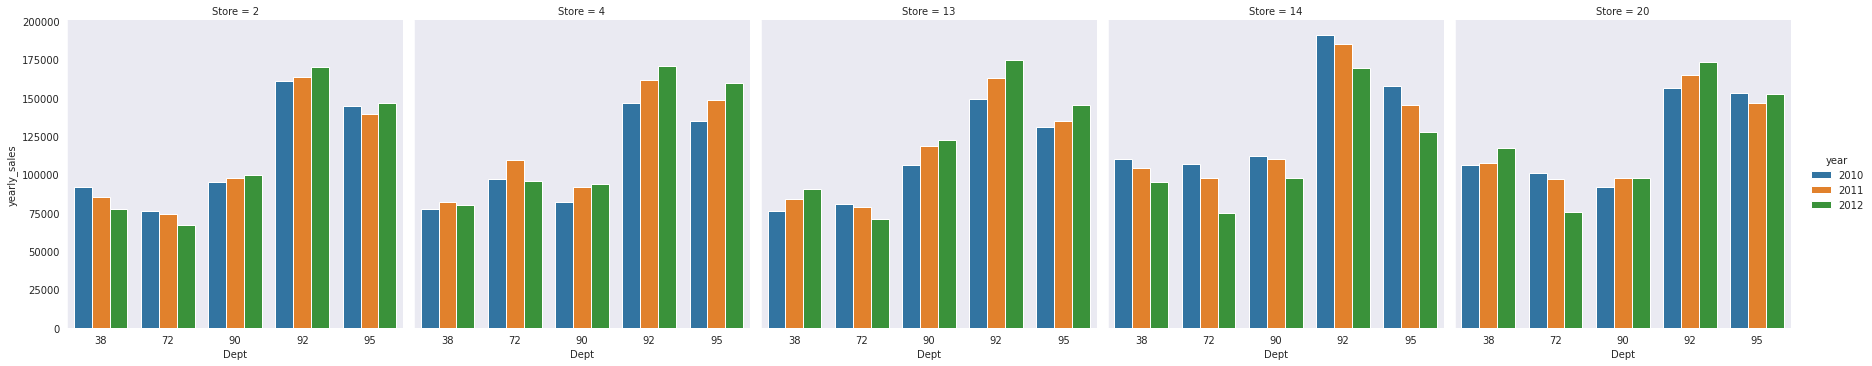

In [90]:
sns.catplot(x='Dept', y='yearly_sales', hue='year', col='Store', data=top_5_yearly, kind='bar')

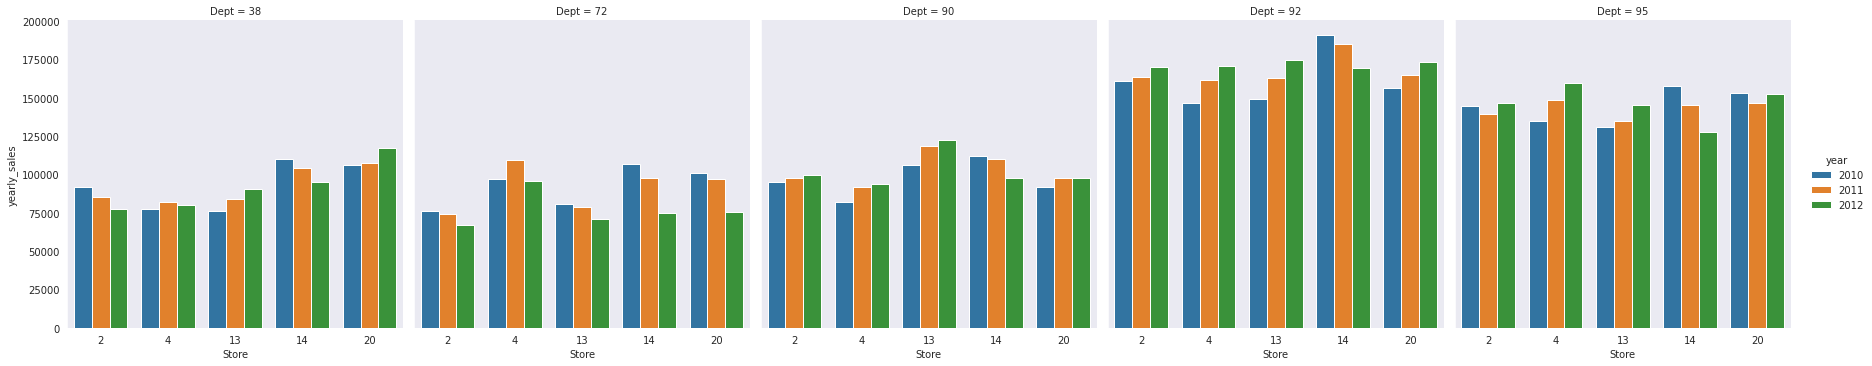

In [91]:
sns.catplot(x='Store', y='yearly_sales', hue='year', col='Dept', data=top_5_yearly, kind='bar')

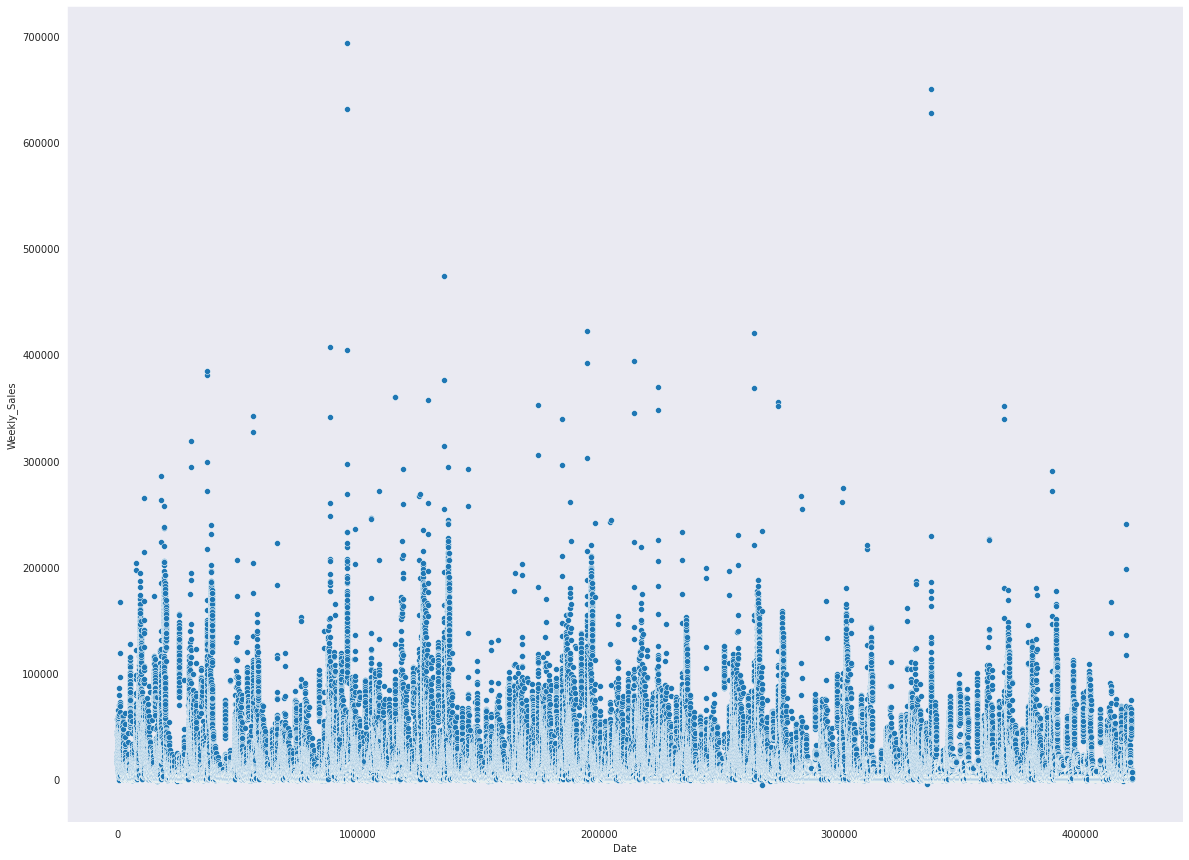

In [100]:
plt.subplots(figsize=(20,15))
clean_df.get_scatter('Weekly_Sales')

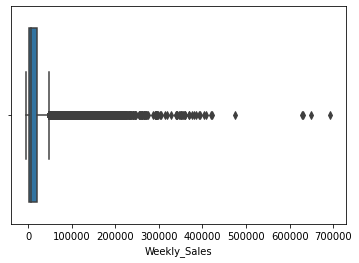

In [ ]:
clean_df.get_boxplot('Weekly_Sales')

In [103]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

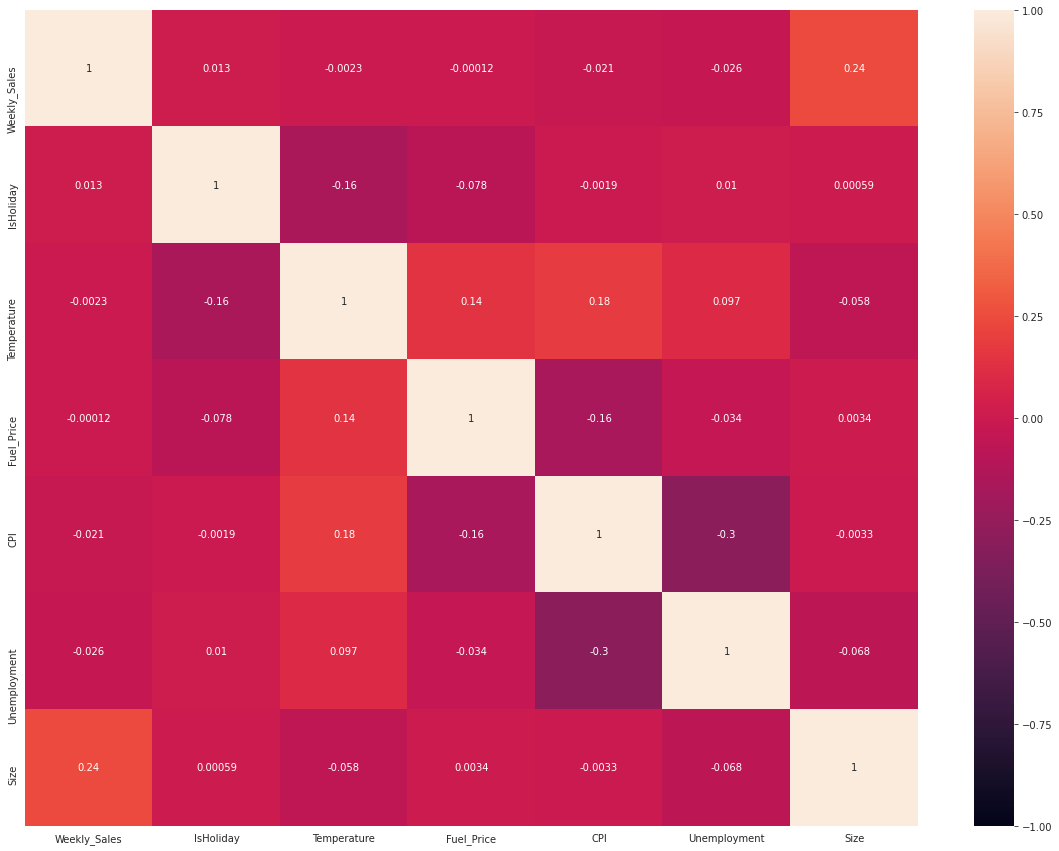

In [106]:
plt.subplots(figsize=(20,15))
sns.heatmap(df[['Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']].corr(), vmin = -1, vmax = 1, annot = True)

## Stacking & Blending Model

## Logging & Benchmarking 